In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Unemployment in India.csv")


In [5]:
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [7]:
print(df.isnull().sum())


Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


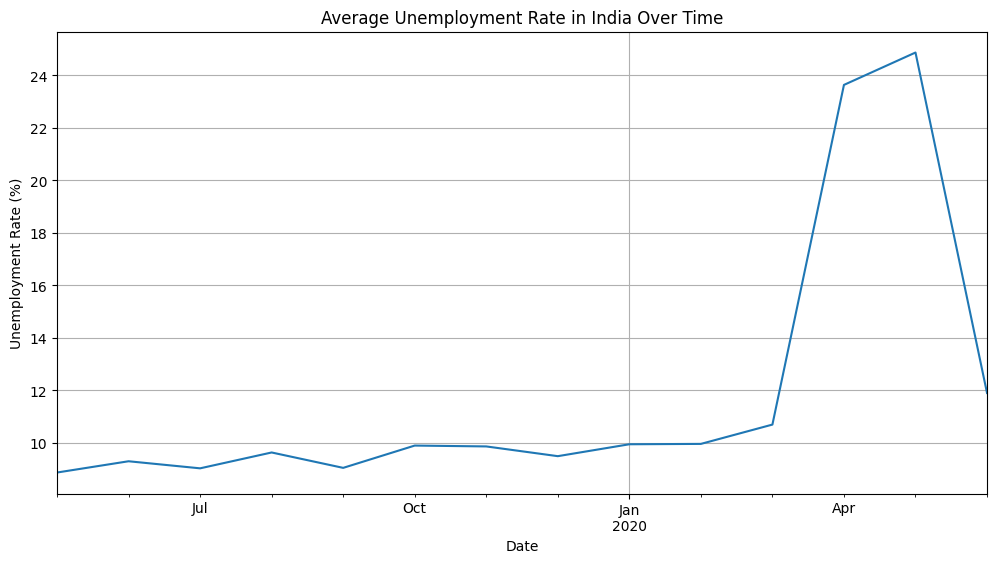

In [8]:
trend = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()
trend.plot(figsize=(12, 6), title="Average Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

C:\Users\91955\AppData\Local\Temp\ipykernel_5520\2337937545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")


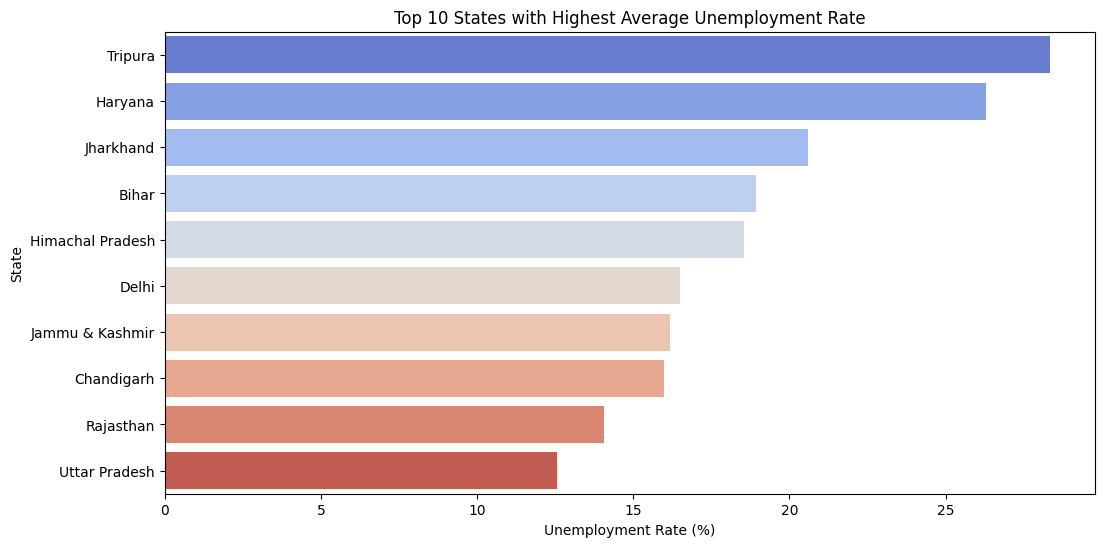

In [10]:
state_avg = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title("Top 10 States with Highest Average Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.show()

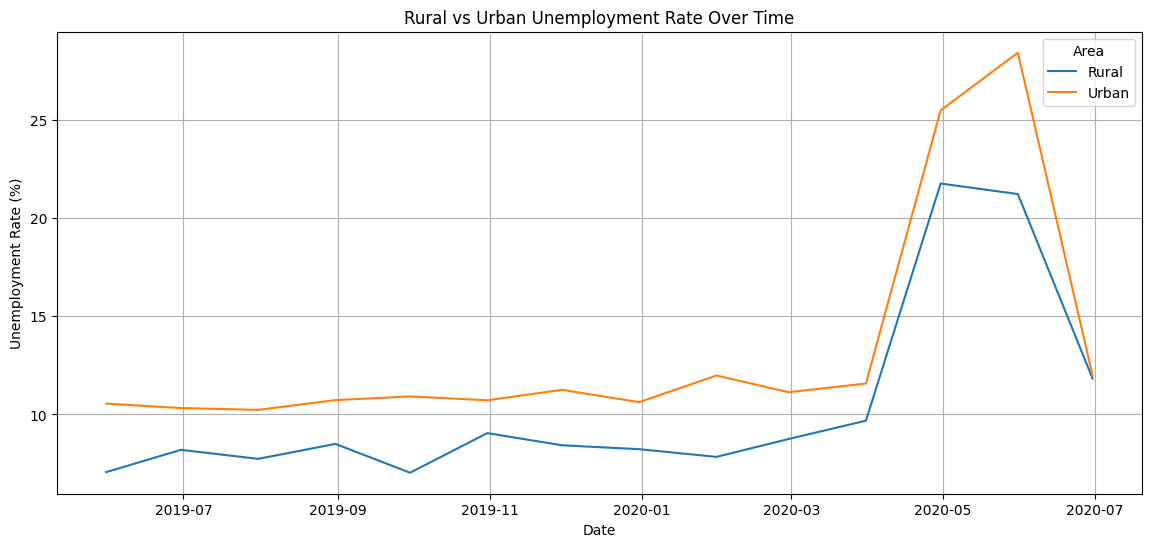

In [11]:
area_trend = df.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=area_trend, x='Date', y='Estimated Unemployment Rate (%)', hue='Area')
plt.title("Rural vs Urban Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Area")
plt.grid(True)
plt.show()

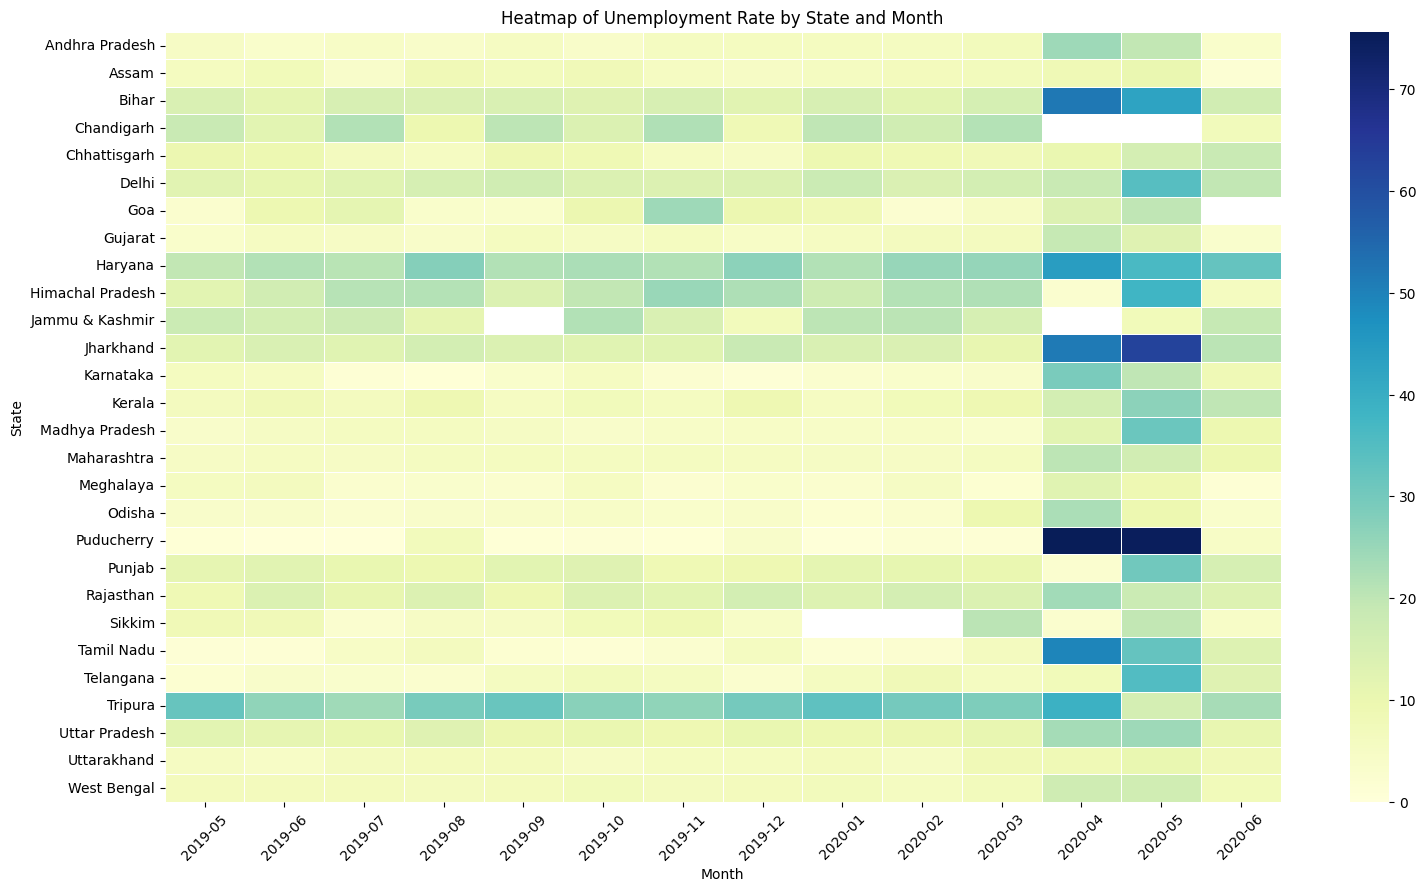

In [12]:
df['Month'] = df['Date'].dt.strftime('%Y-%m')  # Format dates by month
heatmap_data = df.pivot_table(index="Region", columns="Month", values="Estimated Unemployment Rate (%)")

plt.figure(figsize=(18,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Unemployment Rate by State and Month")
plt.xlabel("Month")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.show()